<H1>ACTIVTIY1: PALMER PENGUINS DATA ANALYTICS</H1>
<HR>
<H3>ANALYST: MARIA ASHLEY JOY ENALLO</H3>

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings('ignore')

In [2]:
penguin = pd.read_csv('dataset\\penguins.csv')

In [3]:
penguin

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...,...
339,340,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,341,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,342,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,343,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


<h3>Null Values (CLEANING DATA)</h3>

In [4]:
penguin.isnull().sum()

rowid                 0
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [5]:
penguin['bill_length_mm']=penguin['bill_length_mm'].fillna(penguin['bill_length_mm'].mean())
penguin['bill_depth_mm']=penguin['bill_depth_mm'].fillna(penguin['bill_depth_mm'].mean())
penguin['flipper_length_mm']=penguin['flipper_length_mm'].fillna(penguin['flipper_length_mm'].mean())
penguin['body_mass_g']=penguin['body_mass_g'].fillna(penguin['body_mass_g'].mean())
penguin['sex']=penguin['sex'].fillna(penguin['sex'].mode()[0])

In [6]:
penguin.isnull().sum()

rowid                0
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64

<h3>DATA TYPES</h3>

In [7]:
penguin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     344 non-null    float64
 4   bill_depth_mm      344 non-null    float64
 5   flipper_length_mm  344 non-null    float64
 6   body_mass_g        344 non-null    float64
 7   sex                344 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


In [8]:
penguin['species'] = penguin['species'].astype('category')
penguin['island'] = penguin['island'].astype('category')
penguin['sex'] = penguin['sex'].astype('category')

In [9]:
penguin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   rowid              344 non-null    int64   
 1   species            344 non-null    category
 2   island             344 non-null    category
 3   bill_length_mm     344 non-null    float64 
 4   bill_depth_mm      344 non-null    float64 
 5   flipper_length_mm  344 non-null    float64 
 6   body_mass_g        344 non-null    float64 
 7   sex                344 non-null    category
 8   year               344 non-null    int64   
dtypes: category(3), float64(4), int64(2)
memory usage: 17.6 KB


<h3>DESCRIPTIVE ANALYSIS</h3>

In [10]:
penguin.describe()

,rowid,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000
mean,172.500000,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,99.448479,5.443643,1.969027,14.020657,799.613058,0.818356
min,1.000000,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,86.750000,39.275000,15.600000,190.000000,3550.000000,2007.000000
50%,172.500000,44.250000,17.300000,197.000000,4050.000000,2008.000000
75%,258.250000,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,344.000000,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [11]:
penguin.describe().T

,count,mean,std,min,25%,50%,75%,max
rowid,344.0,172.500000,99.448479,1.0,86.750,172.50,258.25,344.0
bill_length_mm,344.0,43.921930,5.443643,32.1,39.275,44.25,48.50,59.6
bill_depth_mm,344.0,17.151170,1.969027,13.1,15.600,17.30,18.70,21.5
flipper_length_mm,344.0,200.915205,14.020657,172.0,190.000,197.00,213.00,231.0
body_mass_g,344.0,4201.754386,799.613058,2700.0,3550.000,4050.00,4750.00,6300.0
year,344.0,2008.029070,0.818356,2007.0,2007.000,2008.00,2009.00,2009.0


<h2>QUESTION#1: HOW MANY FEMALE BORN IN 2007?</h2>
<HR>

In [12]:
year_female = penguin.groupby(['sex','year']).size()

In [13]:
year_female

sex     year
female  2007    51
        2008    56
        2009    58
male    2007    59
        2008    58
        2009    62
dtype: int64

<H2>INSIGHT: BASED ON THE DATA ABOVE THERE ARE 51 FEMALE PENGUIN BORN IN 2007</h2>
<HR>

<h2>QUESTION#2: HOW MANY MALE BORN IN DREAM ISLAND?</h2>
<HR>

In [14]:
male_dream = penguin.groupby(['island', 'sex']).size()

In [15]:
male_dream

island     sex   
Biscoe     female    80
           male      88
Dream      female    61
           male      63
Torgersen  female    24
           male      28
dtype: int64

<h2>INSIGHT: THERE ARE 62 MALE BORN/LIVE IN DREAM ISLAND</h2>
<HR>

<h2>QUESTION#3: IS THERE A CORRELATION IN PENGUINS FLIPPER AND BODY MASS?</h2>
<HR>

In [16]:
flipper_mass = penguin['flipper_length_mm'].corr(penguin['body_mass_g'])

In [17]:
flipper_mass

np.float64(0.8712017673060115)

<h2>INSIGHT: THEREFORE, THERE IS A HIGH CORRELATION BETWEEN PENGUINS FLIPPER AND BODY MASS</h2>
<HR>

<h2>QUESTION#4: AVERAGE BILL_LENGTH_MM MALES</h2>
<HR>

In [18]:
penguin[penguin['sex'] == 'male']['bill_length_mm'].mean()

np.float64(45.60415564049789)

<h2>INSIGHT: THERE IS AN AVERAGE OF 45.85476190476191 IN MALES BILL LENGTH</h2>
<HR>

<h2>QUESTION#5: WHAT SPECIES COMMONLY FOUND IN TORGERSEN?</h2>
<HR>

In [19]:
penguin[penguin['island'] == 'Torgersen']['species'].value_counts()

species
Adelie       52
Chinstrap     0
Gentoo        0
Name: count, dtype: int64

<h2>INSIGHT: THE SPECIES COMMONLY FOUND IN TORGERSEN IS ADELIE</h2>
<HR>

<h2>QUESTION#6: HOW MANY PENGUINS BORN/ALIVE IN YEAR 2009?</h2>
<HR>

In [20]:
year = penguin.groupby('year').size()

In [21]:
year

year
2007    110
2008    114
2009    120
dtype: int64

<h2>INSIGHT: 120 PENGUINS BORN OR ALIVE IN YEAR 2009</h2>
<HR>

<h2>QUESTION#7: AVERAGE BODY MASS IN BISCOE</h2>
<HR>

In [22]:
penguin[penguin['island'] == 'Biscoe']['body_mass_g'].mean()

np.float64(4712.95687134503)

<h2>INSIGHT: THE AVERAGE MASS OF PENGUINS IN BISCOE IS 4716.017964071856</h2>
<HR>

<h2>QUESTION#8: HOW MANY FEMALE PENGUINS LIVE IN EACH ISLAND?</h2>
<HR>

In [23]:
penguin[penguin['sex'] == 'female']['island'].value_counts()

island
Biscoe       80
Dream        61
Torgersen    24
Name: count, dtype: int64

<h3>INSIGHT: THEREFORE, 80 FEMALE PENGUINS LIVE IN BISCOE, 61 IN DREAM AND 24 IN TORGERSEN</h3>
<hr>

<h3>QUESTION#9: HOW MANY MALE PNGUINS LIVE IN EACH ISLAND?</h3>
<hr>

In [24]:
penguin[penguin['sex'] == 'male']['island'].value_counts()

island
Biscoe       88
Dream        63
Torgersen    28
Name: count, dtype: int64

<h3>INSIGHT: THEREFORE, 83 MALE PENGUINS LIVE IN BISCOE, 62 IN DREAM AND 23 IN TORGERSEN</h3>
<hr>

<h3>QUESTION#10: WHAT GENDER OF PENGUIN COMMONLY FOUND IN EACH ISLAND?</h3>
<hr>

In [25]:
penguin.groupby(['island', 'sex']).size()

island     sex   
Biscoe     female    80
           male      88
Dream      female    61
           male      63
Torgersen  female    24
           male      28
dtype: int64

<h3>INSIGHT: THEREFORE, IN BISCOE MALE IS MORE COMMONLY FOUND AS WELL AS DREAM WHILE IN TORGERSEN FEMALE IS COMMONLY FOUND THE DIFFERENCE IS JUST 1-3 PENGUIN</h3>
<hr>

<h3>QUESTION#11: Which sex (male or female) tends to have the greater body mass on average?</h3>
<hr>

In [26]:
penguin[penguin['sex'] == 'female']['body_mass_g'].mean()

np.float64(3862.2727272727275)

In [27]:
penguin[penguin['sex'] == 'male']['body_mass_g'].mean()

np.float64(4514.684406547094)

<h3>INSIGHT: MALE TEND TO HAVE GREATER BODY MASS BASED ON THEIR AVERAGE </h3>
<hr>

<h3>QUESTION#12: How many penguins in the dataset have a body mass greater than 5,000 grams?</h3>
<hr>

In [28]:
count = (penguin['body_mass_g'] > 5000).sum()

In [29]:
count

np.int64(61)

<h3>INSIGHT: THERE ARE 61 PENGUINS THAT HAS A BODY MASS GREATER THAN 5000 GRAMS </h3>
<hr>

<h3>QUESTION#13: What is the correlation between bill length and bill depth?</h3>
<hr>

In [30]:
length_depth = penguin['bill_length_mm'].corr(penguin['bill_depth_mm'])
length_depth

np.float64(-0.23505287035553285)

<h3>INSIGHT: THERE IS NO CORRELATION BETWEEN BILL LENGTH AND BILL DEPTH. IT RESULT THAT -0.24, IT MEANS THAT BILL LENGTH HAS NOTING TO DO WITH BILL DEPTH</h3>

<h3>QUESTION#14: DOES BODY MASS CORRELATE WITH YEAR OF OBSERVATION(2007,2008,2009)?</h3>
<hr>

In [31]:
year = penguin['year'].corr(penguin['body_mass_g'])
year

np.float64(0.042025081618089245)

<h3>INSIGHT: THERE IS NO CORRELATION BETWEEN YEAR AND BODY MASS OF PENGUINS. SINCE THE RESULT IS 0.04, IT MEANS THAT YEAR HAS NOTHING TO DO WITH BODY MASS OF PENGUINS</h3>
<hr>

<H3>QUESTION#14: What is the standard deviation of body mass for each sex?</H3>
<HR>

In [32]:
sex_bm = penguin[penguin['sex'] == 'male']['body_mass_g'].std()
sex_bm

np.float64(786.0526749981204)

In [33]:
sex_bf = penguin[penguin['sex'] == 'female']['body_mass_g'].std()
sex_bf

np.float64(666.1720495161449)

<h3>INSIGHT: THEREFORE THE STANDARD DEVIATION OF BODY MASS FOR EACH SEX OF PENGUIN IS MALE = 787.6288841581745 FEMALE = 666.1720495161449. IT MEANS THAT MALE HAS A HIGHER SD THAN FEMALE.  </h3>

<H3>QUESTION#15: How many penguins have a flipper length greater than 210 mm?</H3>
<HR>

In [34]:
flipper_p = (penguin['flipper_length_mm'] > 210).sum()
flipper_p

np.int64(100)

<h3>INSIGHT: THERE'S 100 PENGUIN THAT HAS GREATER THAN 210MM FLIPPER LENGTH. IT MEANS THAT THERES ALOT OF PENGUIN WITH 210 ABOVE FLIPPER LENGTH.</h3>

<H3>QUESTION#16: What species has the most longer flipper length > 220mm?</H3>
<HR>

In [35]:
filtered = penguin[penguin["flipper_length_mm"] > 220]
filtered

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
153,154,Gentoo,Biscoe,50.0,16.3,230.0,5700.0,male,2007
169,170,Gentoo,Biscoe,49.2,15.2,221.0,6300.0,male,2007
171,172,Gentoo,Biscoe,48.7,15.1,222.0,5350.0,male,2007
182,183,Gentoo,Biscoe,47.3,15.3,222.0,5250.0,male,2007
185,186,Gentoo,Biscoe,59.6,17.0,230.0,6050.0,male,2007
193,194,Gentoo,Biscoe,49.6,16.0,225.0,5700.0,male,2008
196,197,Gentoo,Biscoe,50.5,15.9,222.0,5550.0,male,2008
199,200,Gentoo,Biscoe,50.5,15.9,225.0,5400.0,male,2008
205,206,Gentoo,Biscoe,50.1,15.0,225.0,5000.0,male,2008
211,212,Gentoo,Biscoe,50.4,15.3,224.0,5550.0,male,2008


In [36]:
species_counts = filtered["species"].value_counts()
species_counts

species
Gentoo       35
Adelie        0
Chinstrap     0
Name: count, dtype: int64

<h3>INSIGHT: The most common species with flipper length > 220 mm is species Gentoo with 35 penguins</h3>

<H3>QUESTION#17: What is the maximum flipper length recorded per species?</H3>
<HR>

In [37]:
penguin_clean = penguin.dropna(subset=["flipper_length_mm", "species"])
penguin_clean

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,male,2007
1,2,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,female,2007
2,3,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,female,2007
3,4,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,male,2007
4,5,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,female,2007
...,...,...,...,...,...,...,...,...,...
339,340,Chinstrap,Dream,55.80000,19.80000,207.000000,4000.000000,male,2009
340,341,Chinstrap,Dream,43.50000,18.10000,202.000000,3400.000000,female,2009
341,342,Chinstrap,Dream,49.60000,18.20000,193.000000,3775.000000,male,2009
342,343,Chinstrap,Dream,50.80000,19.00000,210.000000,4100.000000,male,2009


In [38]:
max_flipper_length = penguin_clean.groupby("species")["flipper_length_mm"].max()
max_flipper_length

species
Adelie       210.0
Chinstrap    212.0
Gentoo       231.0
Name: flipper_length_mm, dtype: float64

<h3>INSIGHT: THE MAXIMUM FLIPPER LENGTH RECORDED PER EACH SPECIES IS 210 FOR ADELIE, 212 FOR CHINSTRAP, AND 231 FOR GENTOO. IT MEANS THAT GENTOO HAS THE LONGEST LENGTH RECORDED WITH 231MM.</h3>

<h3>VISUALIZATION</h3>
<HR>

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
penguins = sns.load_dataset('penguins')

<h3>Question#1: Do penguins from different islands have noticeably different flipper lengths?</h3>

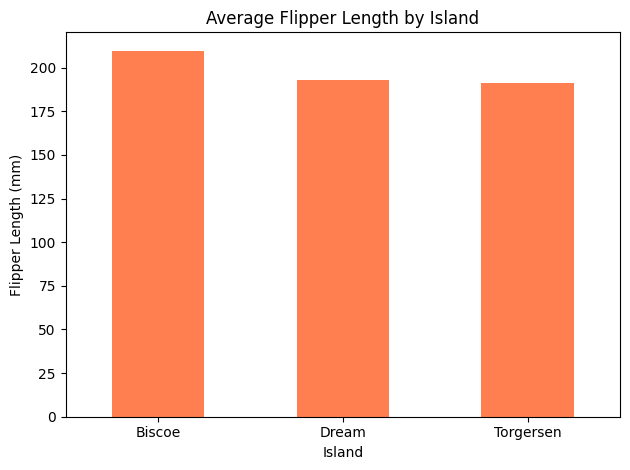

In [41]:
avg_flipper = penguins.groupby('island')['flipper_length_mm'].mean()

avg_flipper.plot(kind='bar', color='coral')
plt.title('Average Flipper Length by Island')
plt.xlabel('Island')
plt.ylabel('Flipper Length (mm)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

<h3>INSIGHT: Penguins on Biscoe Island have the longest average flipper length, while those on Dream Island have the shortest.</h3>

<h3>Question#2: Is there a balance between male and female penguins in the dataset?</h3>

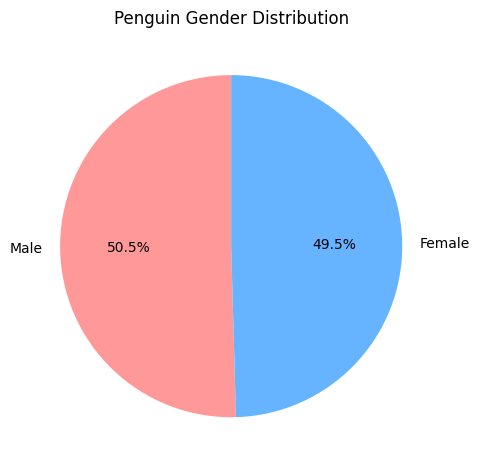

In [42]:
gender_counts = penguins['sex'].value_counts()

gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90,
                   colors=['#ff9999','#66b3ff'])
plt.title('Penguin Gender Distribution')
plt.ylabel('')
plt.tight_layout()
plt.show()

<h3>INSIGHT: The distribution of male and female penguins is nearly even Male Penguins are 50.5% while Female Penguins are 49.5%. I can say that there is a balance between the two.</h3>